# Anscombe’s quartet

## Lib's

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score


## Dataset

In [2]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## Linear Regression

In [3]:
def lm(df):
    
    b0 = []
    b1 = []
    r2 = []
    
    x = df['x'].values
    Y = df['y'].values

    x = x.reshape(-1, 1)

    lm = LinearRegression()
    lm.fit(x, Y)
    
    b0.append(round(lm.intercept_,4))
    b1.append(lm.coef_[0])
    r2.append(r2_score(df['y'].values, lm.predict(x)))

    return pd.DataFrame({ 'MOD' : df['dataset'].unique(),
                         'intercept' : b0,
                        'coef' : b1,
                        'r2' : r2}, index = [0])

In [4]:
results = []

for i in df['dataset'].unique():
    i = lm(df[df['dataset'] == i])
    results.append(i)
    
aux = pd.DataFrame()
aux.append(results)

,MOD,intercept,coef,r2
0,I,3.0001,0.500091,0.666542
0,II,3.0009,0.500000,0.666242
0,III,3.0025,0.499727,0.666324
0,IV,3.0017,0.499909,0.666707


## Dispersão

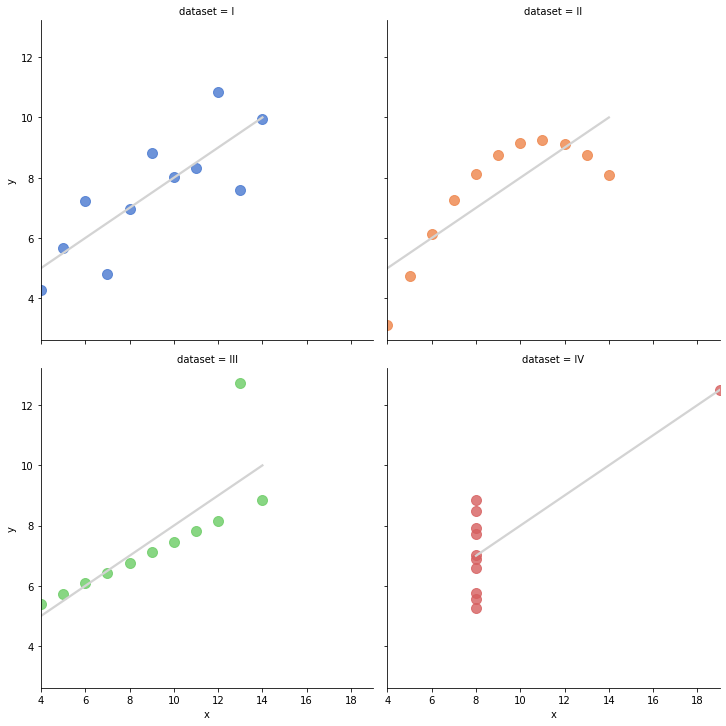

In [53]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=5,
          line_kws={'color': 'lightgrey'},
          scatter_kws={"s": 100});

